In [101]:
import pandas as pd
import numpy as np
import os

In [102]:
forcing_data_path = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\data\LittleWashita\little_washita_2006_2012.csv"
data = pd.read_csv(forcing_data_path)
data.head()

,time,precip_rate,PET
0,2006-09-19 00:00:00,0.0,0.000161
1,2006-09-19 01:00:00,0.0,0.000161
2,2006-09-19 02:00:00,0.0,0.000161
3,2006-09-19 03:00:00,0.0,0.000161
4,2006-09-19 04:00:00,0.0,0.000161


In [103]:
data.tail()

,time,precip_rate,PET
52627,2012-09-19 19:00:00,0.0,0.000443
52628,2012-09-19 20:00:00,0.0,0.000443
52629,2012-09-19 21:00:00,0.0,0.000443
52630,2012-09-19 22:00:00,0.0,0.000443
52631,2012-09-19 23:00:00,0.0,0.000443


In [104]:
q_data_path = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\data\LittleWashita\test_sm_basinavg.csv"
q_data = pd.read_csv(q_data_path)
PET = data["PET"]*1000 #m/hr->mm/hr
Q = q_data["Flow"]*1000 #m/hr -> mm/hr
P = data["precip_rate"]*1000

,P[mm/hr],Q[mm/hr],PET[mm/hr]
time,,,
2006-09-19 00:00:00,0.0,0.061317,0.161146
2006-09-19 01:00:00,0.0,0.060384,0.161146
2006-09-19 02:00:00,0.0,0.058942,0.161146
2006-09-19 03:00:00,0.0,0.058264,0.161146
2006-09-19 04:00:00,0.0,0.057797,0.161146


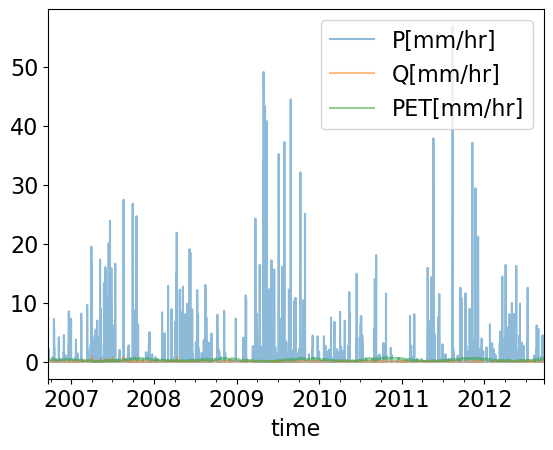

In [105]:
ptq = pd.DataFrame({"time": data["time"], "P[mm/hr]":P, "Q[mm/hr]":Q, "PET[mm/hr]":PET})
ptq["time"] = pd.to_datetime(ptq["time"])
ptq.set_index("time", inplace=True)
ptq.plot(alpha=0.5)
ptq.head()

In [106]:
T_path = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\0_data_preprocessing\raw_data\LittleWashita\data_ars_temp2\ars_a156_TAIR.csv"

In [107]:
T_data = pd.read_csv(T_path)
T_data['time'] = np.nan
T_data['time'] = pd.to_datetime(T_data['datetime'])
T_data.set_index("time", inplace=True)
T_data.head()

,datetime,TAIR
time,,
2006-01-01 00:00:00,2006-01-01 00:00:00,15.200000
2006-01-01 01:00:00,2006-01-01 01:00:00,14.708333
2006-01-01 02:00:00,2006-01-01 02:00:00,13.750000
2006-01-01 03:00:00,2006-01-01 03:00:00,13.400000
2006-01-01 04:00:00,2006-01-01 04:00:00,14.241667


In [108]:
T_data.tail()

,datetime,TAIR
time,,
2010-11-30 20:00:00,2010-11-30 20:00:00,NaN
2010-11-30 21:00:00,2010-11-30 21:00:00,NaN
2010-11-30 22:00:00,2010-11-30 22:00:00,NaN
2010-11-30 23:00:00,2010-11-30 23:00:00,NaN
2010-12-01 00:00:00,2010-12-01 00:00:00,NaN


<AxesSubplot:xlabel='time'>

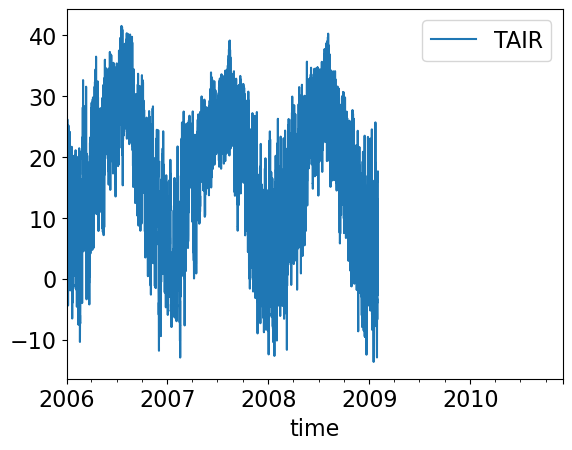

In [109]:
T_data.plot()

In [110]:
new_data = {
    'datetime': pd.date_range(start='2009-01-01', end='2012-12-31', freq='H'),
    'TAIR': T_data['TAIR'][:35041].values
}
new_df = pd.DataFrame(new_data)
new_df['time'] = pd.to_datetime(new_df['datetime'])
new_df.set_index("time", inplace=True)
new_df.head()

,datetime,TAIR
time,,
2009-01-01 00:00:00,2009-01-01 00:00:00,15.200000
2009-01-01 01:00:00,2009-01-01 01:00:00,14.708333
2009-01-01 02:00:00,2009-01-01 02:00:00,13.750000
2009-01-01 03:00:00,2009-01-01 03:00:00,13.400000
2009-01-01 04:00:00,2009-01-01 04:00:00,14.241667


<AxesSubplot:xlabel='time'>

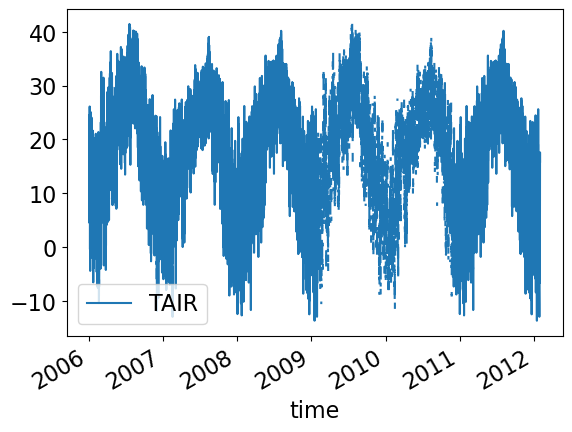

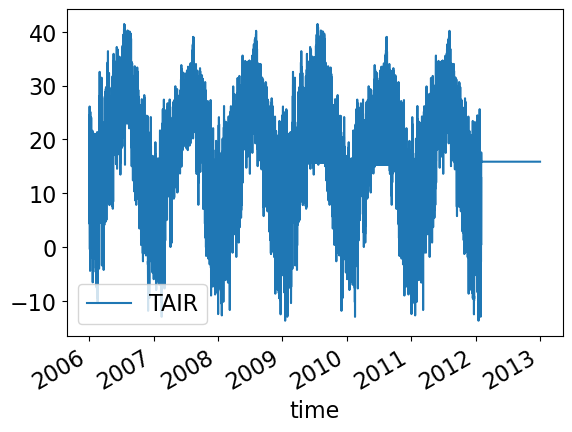

In [111]:
result_df = pd.concat([T_data, new_df])
result_df.plot()
result_df['TAIR'] = result_df['TAIR'].interpolate(method='linear')
result_df.plot()

In [112]:
ptq

,P[mm/hr],Q[mm/hr],PET[mm/hr]
time,,,
2006-09-19 00:00:00,0.0,0.061317,0.161146
2006-09-19 01:00:00,0.0,0.060384,0.161146
2006-09-19 02:00:00,0.0,0.058942,0.161146
2006-09-19 03:00:00,0.0,0.058264,0.161146
2006-09-19 04:00:00,0.0,0.057797,0.161146
...,...,...,...
2012-09-19 19:00:00,0.0,0.000335,0.443317
2012-09-19 20:00:00,0.0,0.000319,0.443317
2012-09-19 21:00:00,0.0,0.000297,0.443317


<AxesSubplot:xlabel='time'>

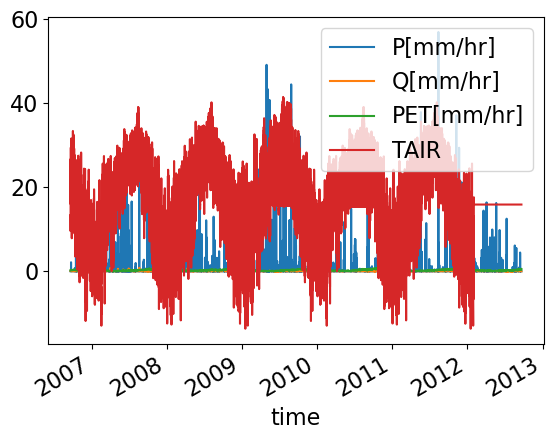

In [113]:
merged_df = ptq.merge(result_df, on='time', how='left')
merged_df.plot()

,P[mm/hr],Q[mm/hr],PET[mm/hr],TAIR
time,,,,
2006-09-19 00:00:00,0.0,0.061317,0.161146,13.341667
2006-09-19 01:00:00,0.0,0.060384,0.161146,12.225000
2006-09-19 02:00:00,0.0,0.058942,0.161146,12.583333
2006-09-19 03:00:00,0.0,0.058264,0.161146,11.183333
2006-09-19 04:00:00,0.0,0.057797,0.161146,10.516667
...,...,...,...,...
2012-09-19 19:00:00,0.0,0.000335,0.443317,15.866667
2012-09-19 20:00:00,0.0,0.000319,0.443317,15.866667
2012-09-19 21:00:00,0.0,0.000297,0.443317,15.866667


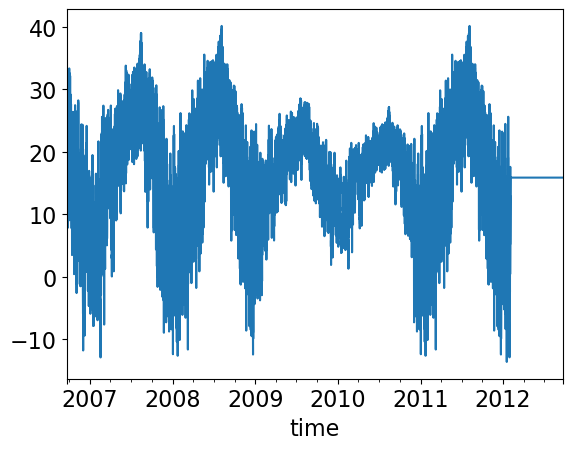

In [114]:
start_date = '2006-01-01 00:00:00'
end_date = '2012-09-19 23:00:00'
date_rng = pd.date_range(start=start_date, end=end_date, freq='H')
resampled_df = merged_df.resample('H').mean() 
resampled_df['Q[mm/hr]'].fillna(-9999, inplace=True)
resampled_df['P[mm/hr]'].fillna(-9999, inplace=True)
resampled_df['TAIR'].fillna(-9999, inplace=True)
resampled_df['TAIR'].plot()
resampled_df

<AxesSubplot:xlabel='time'>

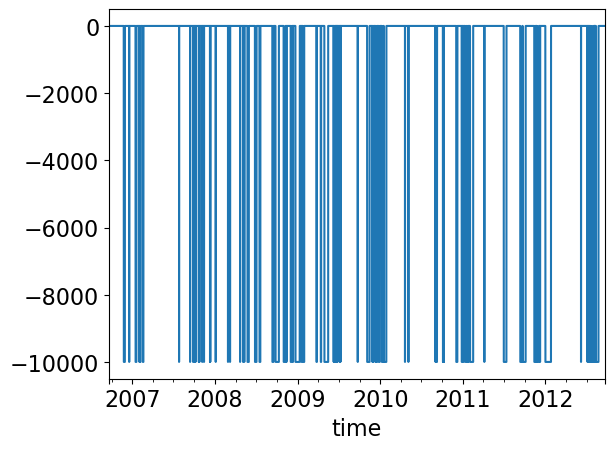

In [115]:
resampled_df['Q[mm/hr]'].plot()

<AxesSubplot:xlabel='time'>

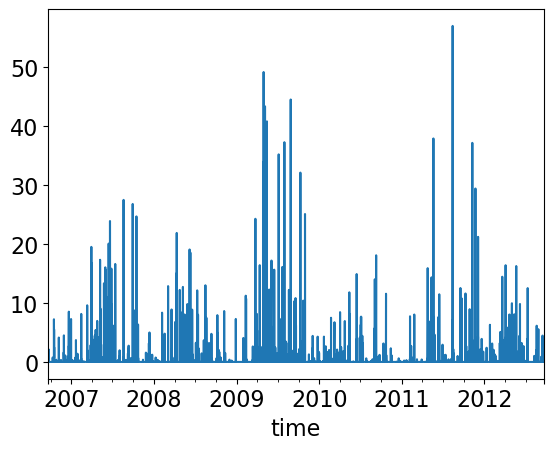

In [116]:
resampled_df['P[mm/hr]'].plot()

<AxesSubplot:xlabel='time'>

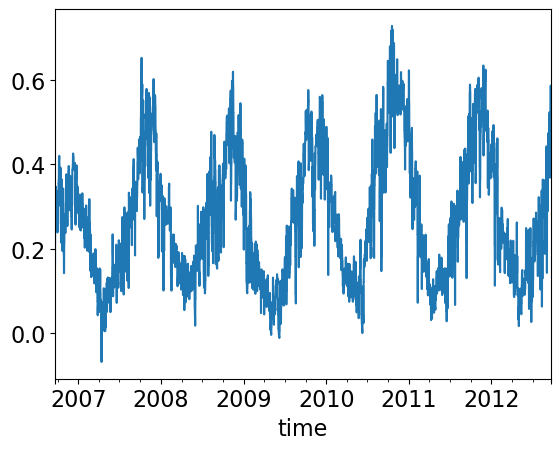

In [117]:
resampled_df['PET[mm/hr]'].plot()

In [118]:
output_df = resampled_df[start_date:end_date].copy()

In [119]:
output_path = r"C:\Program Files (x86)\HBV-light\Data\LittleWashita\data"
file_path = os.path.join(output_path, "EVAP.txt")
with open(file_path, 'w') as file:
    # Write the header line as "Little Washita"
    file.write("EVAP\n")
    # Save the DataFrame as tab-delimited data, excluding the index
output_df['PET[mm/hr]'].to_csv(os.path.join(output_path, "EVAP.txt"), header=None, index=None, mode='a')
output_df['PET[mm/hr]'].size

52632

In [120]:
output_df['Date'] = output_df.index.strftime('%Y%m%d %HH:%mm:%ss')
output_df['Date'] = output_df['Date'].str.replace("-", "")
output_df

,P[mm/hr],Q[mm/hr],PET[mm/hr],TAIR,Date
time,,,,,
2006-09-19 00:00:00,0.0,0.061317,0.161146,13.341667,20060919 00:00:00
2006-09-19 01:00:00,0.0,0.060384,0.161146,12.225000,20060919 01:00:00
2006-09-19 02:00:00,0.0,0.058942,0.161146,12.583333,20060919 02:00:00
2006-09-19 03:00:00,0.0,0.058264,0.161146,11.183333,20060919 03:00:00
2006-09-19 04:00:00,0.0,0.057797,0.161146,10.516667,20060919 04:00:00
...,...,...,...,...,...
2012-09-19 19:00:00,0.0,0.000335,0.443317,15.866667,20120919 19:00:00
2012-09-19 20:00:00,0.0,0.000319,0.443317,15.866667,20120919 20:00:00
2012-09-19 21:00:00,0.0,0.000297,0.443317,15.866667,20120919 21:00:00


In [121]:
file_path = os.path.join(output_path, "ptq.txt")
with open(file_path, 'w') as file:
    # Write the header line as "Little Washita"
    file.write("Little Washita\n")
    # Save the DataFrame as tab-delimited data, excluding the index
output_df[["Date", "P[mm/hr]", "TAIR", "Q[mm/hr]"]].to_csv(file_path, index=None, sep='\t', mode='a')

In [122]:
daily_mean_tair = output_df['TAIR'].resample('D').mean()
daily_mean_tair

time
2006-09-19    18.397917
2006-09-20    22.681597
2006-09-21    21.467361
2006-09-22    22.572222
2006-09-23    19.826736
                ...    
2012-09-15    15.866667
2012-09-16    15.866667
2012-09-17    15.866667
2012-09-18    15.866667
2012-09-19    15.866667
Freq: D, Name: TAIR, Length: 2193, dtype: float64

In [123]:
output_df['DayOfYear'] = output_df.index.strftime('%m-%d')
average_daily_values = output_df.groupby('DayOfYear')['TAIR'].mean()
average_daily_values.to_csv(os.path.join(output_path, "t_mean.txt"), index=None, header=None)
output_path_daily =  r"C:\Program Files (x86)\HBV-light\Data\LittleWashita_daily\data"
average_daily_values.to_csv(os.path.join(output_path_daily, "t_mean.txt"), index=None, header=None)

In [124]:
daily_df = pd.DataFrame()
daily_df['Q[mm/hr]'] = output_df['Q[mm/hr]'].resample('D').sum()
daily_df['P[mm/hr]'] = output_df['P[mm/hr]'].resample('D').sum()
daily_df['TAIR'] = output_df['TAIR'].resample('D').mean()

<AxesSubplot:xlabel='time'>

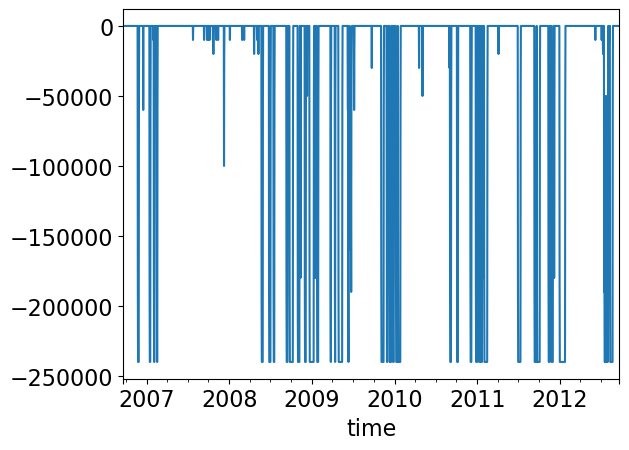

In [125]:
daily_df['Q[mm/hr]'].plot()

# Daily

In [126]:
daily_df['Date'] = daily_df.index.strftime('%Y%m%d')
daily_df['Date'] = daily_df['Date'].str.replace("-", "")
daily_df

,Q[mm/hr],P[mm/hr],TAIR,Date
time,,,,
2006-09-19,1.164473,0.000000,18.397917,20060919
2006-09-20,0.525987,0.000000,22.681597,20060920
2006-09-21,0.183824,4.320360,21.467361,20060921
2006-09-22,0.077982,0.000000,22.572222,20060922
2006-09-23,0.053599,0.000000,19.826736,20060923
...,...,...,...,...
2012-09-15,0.014308,0.426238,15.866667,20120915
2012-09-16,0.012539,0.020492,15.866667,20120916
2012-09-17,0.011493,0.080685,15.866667,20120917


In [127]:
file_path = os.path.join(output_path_daily, "ptq.txt")

with open(file_path, 'w') as file:
    # Write the header line as "Little Washita"
    file.write("Little Washita daily\n")
    # Save the DataFrame as tab-delimited data, excluding the index
daily_df[["Date", "P[mm/hr]", "TAIR", "Q[mm/hr]"]].to_csv(file_path, index=None, sep='\t', mode='a')

In [128]:
daily_df

,Q[mm/hr],P[mm/hr],TAIR,Date
time,,,,
2006-09-19,1.164473,0.000000,18.397917,20060919
2006-09-20,0.525987,0.000000,22.681597,20060920
2006-09-21,0.183824,4.320360,21.467361,20060921
2006-09-22,0.077982,0.000000,22.572222,20060922
2006-09-23,0.053599,0.000000,19.826736,20060923
...,...,...,...,...
2012-09-15,0.014308,0.426238,15.866667,20120915
2012-09-16,0.012539,0.020492,15.866667,20120916
2012-09-17,0.011493,0.080685,15.866667,20120917


In [132]:
file_path = os.path.join(output_path_daily, "EVAP.txt")
with open(file_path, 'w') as file:
    # Write the header line as "Little Washita"
    file.write("EVAP\n")
    # Save the DataFrame as tab-delimited data, excluding the index
output_df['PET[mm/hr]'].resample('D').sum().to_csv(os.path.join(output_path_daily, "EVAP.txt"), header=None, index=None, mode='a')
output_df['PET[mm/hr]'].size

52632